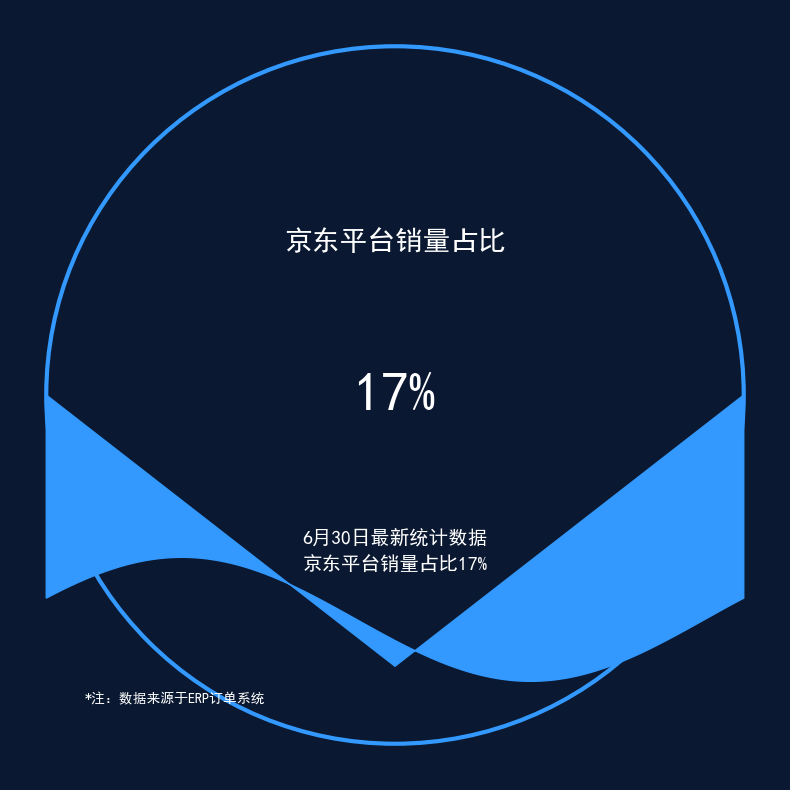

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import interpolate

plt.rcParams['font.sans-serif'] = ['SimHei', 'Microsoft YaHei']
plt.rcParams['axes.unicode_minus'] = False

file_path = "D:\\python\\新建文件夹\\erp_order_data.xlsx"
df = pd.read_excel(file_path)

order_id_col = "online_order_number"
platform_col = "platform"
jd_name = "京东"

df_clean = df[[order_id_col, platform_col]].dropna()
platform_sales = df_clean.groupby(platform_col)[order_id_col].count().reset_index()
platform_sales.rename(columns={order_id_col: "销量"}, inplace=True)

jd_sales = platform_sales[platform_sales[platform_col] == jd_name]["销量"].values[0]
total_sales = platform_sales["销量"].sum()
jd_ratio = jd_sales / total_sales
jd_percent = jd_ratio * 100

fig, ax = plt.subplots(figsize=(8, 8), facecolor='#0A1931')
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
ax.axis('equal')

circle_outer = plt.Circle((5, 5), 4.5, color='none', ec='#3399FF', linewidth=3)
ax.add_patch(circle_outer)

x = np.linspace(0.5, 9.5, 100)
y = 5 - 3.5 * (1 - jd_ratio) + 0.8 * np.sin(2 * np.pi * x / 9)
tck = interpolate.splrep(x, y, s=0)
x_smooth = np.linspace(0.5, 9.5, 300)
y_smooth = interpolate.splev(x_smooth, tck, der=0)
x_smooth = np.append(x_smooth, [9.5, 5, 0.5])
y_smooth = np.append(y_smooth, [5, 5 - 3.5, 5])
water = plt.Polygon(np.column_stack([x_smooth, y_smooth]), color='#3399FF')
ax.add_patch(water)

ax.text(5, 5, f'{jd_percent:.0f}%', ha='center', va='center', fontsize=40, fontweight='bold', color='white')
ax.text(5, 7, '京东平台销量占比', ha='center', va='center', fontsize=20, fontweight='bold', color='white')
ax.text(5, 3, f'6月30日最新统计数据\n京东平台销量占比{jd_percent:.0f}%', ha='center', va='center', fontsize=14, color='white', linespacing=1.5)
ax.text(1, 1, '*注：数据来源于ERP订单系统', ha='left', va='bottom', fontsize=10, color='white')

ax.axis('off')
plt.tight_layout()
plt.show()

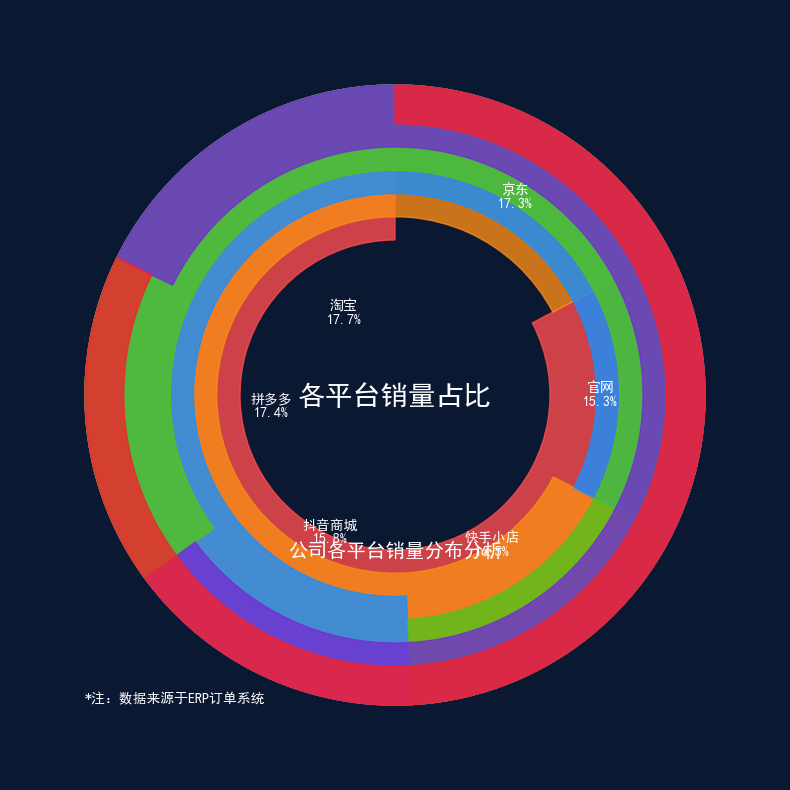

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Wedge
import numpy as np

plt.rcParams['font.sans-serif'] = ['SimHei', 'Microsoft YaHei']
plt.rcParams['axes.unicode_minus'] = False

file_path = "D:\\python\\新建文件夹\\erp_order_data.xlsx"
df = pd.read_excel(file_path)

order_id_col = "online_order_number"
platform_col = "platform"

df_clean = df[[order_id_col, platform_col]].dropna()
platform_sales = df_clean.groupby(platform_col)[order_id_col].count().reset_index()
platform_sales.rename(columns={order_id_col: "销量"}, inplace=True)

platform_sales['占比'] = platform_sales['销量'] / platform_sales['销量'].sum() * 100
platforms = platform_sales[platform_col].tolist()
percentages = platform_sales['占比'].tolist()
colors = ['#FF4D4F', '#FA8C16', '#1890FF', '#52C41A', '#722ED1', '#F5222D', '#FAAD14', '#13C2C2']

fig, ax = plt.subplots(figsize=(8, 8), facecolor='#0A1931')
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
ax.axis('equal')

radius = 4
width = 2
start_angle = 90
label_radius_adjust = 0.5
for i, (platform, pct) in enumerate(zip(platforms, percentages)):
    end_angle = start_angle - pct / 100 * 360
    wedge = Wedge((5, 5), radius, start_angle, end_angle, width=width, color=colors[i % len(colors)], alpha=0.8)
    ax.add_patch(wedge)    
    mid_angle = (start_angle + end_angle) / 2
    rad = np.radians(mid_angle)
    label_radius = radius - width/2 - label_radius_adjust * i
    x = 5 + label_radius * np.cos(rad)
    y = 5 + label_radius * np.sin(rad)
    ax.text(x, y, f'{platform}\n{pct:.1f}%', ha='center', va='center', color='white', fontsize=10, linespacing=1.2)    
    start_angle = end_angle
    width -= 0.3 if width > 0.5 else 0

ax.text(5, 5, '各平台销量占比', ha='center', va='center', fontsize=20, fontweight='bold', color='white')
ax.text(5, 3, '公司各平台销量分布分析', ha='center', va='center', fontsize=14, color='white', linespacing=1.5)
ax.text(1, 1, '*注：数据来源于ERP订单系统', ha='left', va='bottom', fontsize=10, color='white')

ax.axis('off')
plt.tight_layout()
plt.show()

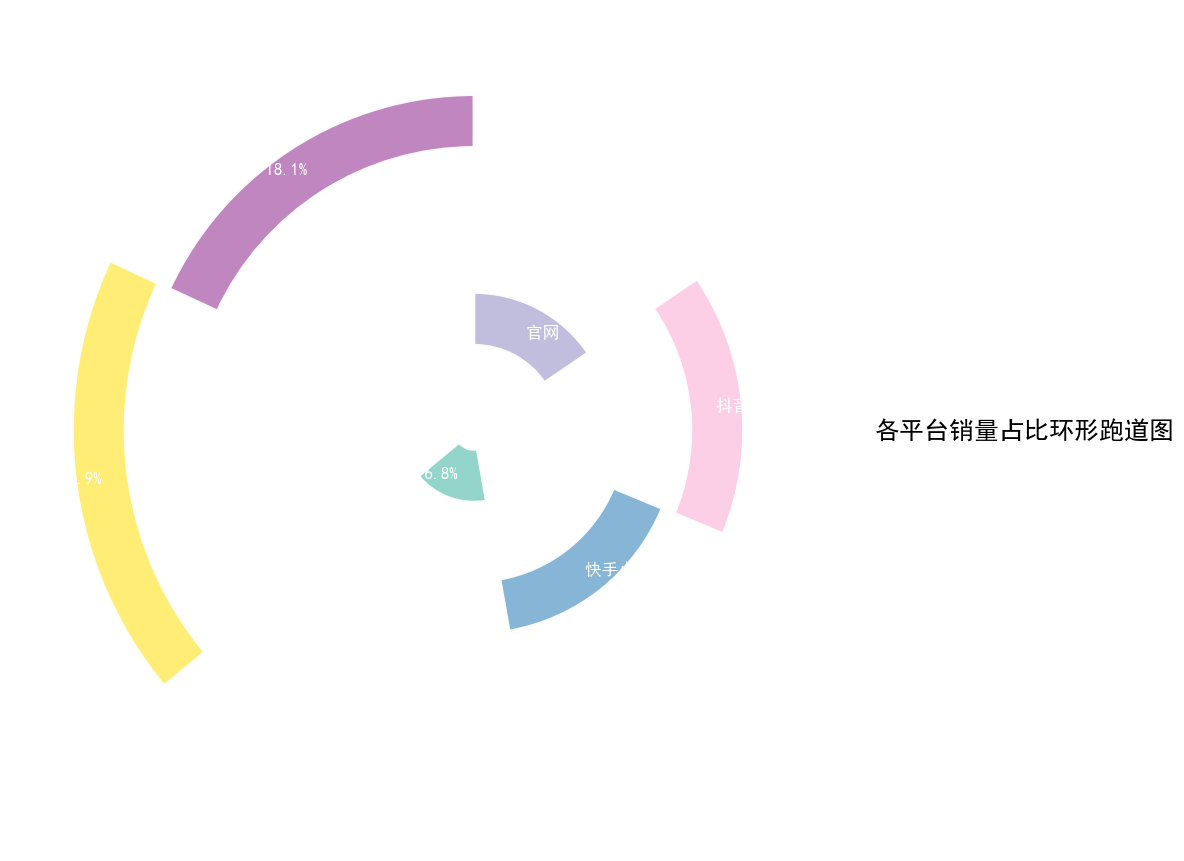

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.sans-serif'] = ['SimHei', 'DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.size'] = 11

# 读取数据并计算各平台销量占比
df = pd.read_excel(r"D:\python\新建文件夹\erp_order_data.xlsx")
platform_sales = df.groupby('platform')['quantity'].sum().reset_index()
platform_sales['销量占比(%)'] = (platform_sales['quantity'] / platform_sales['quantity'].sum()) * 100
platform_sales = platform_sales.sort_values('销量占比(%)', ascending=True)

# 创建极坐标图形（环形跑道图基础）
fig, ax = plt.subplots(figsize=(12, 12), subplot_kw={'projection': 'polar'})
ax.set_theta_zero_location('N')  # 起始角度设为顶部（北方）
ax.set_theta_direction(-1)       # 顺时针方向排列
ax.grid(False)                   # 隐藏网格
ax.spines['polar'].set_visible(False)  # 隐藏极坐标边框
ax.set_xticks([])                # 隐藏角度刻度
ax.set_yticks([])                # 隐藏半径刻度

# 设置环形条带参数（控制厚度和间距）
band_height = 0.12
start_radius = 0.5
colors = plt.cm.Set3(np.linspace(0, 1, len(platform_sales)))
start_angle = 0  # 起始角度

# 绘制各平台环形条带
for idx, row in platform_sales.iterrows():
    # 计算条带对应的弧度（占比转换为2π范围内的角度）
    angle_width = (row['销量占比(%)'] / 100) * 2 * np.pi
    # 绘制环形条带
    ax.barh(
        y=start_radius + idx * band_height,
        width=angle_width,
        height=band_height * 0.8,
        left=start_angle,
        color=colors[idx],
        edgecolor='white',
        linewidth=2,
        alpha=0.95
    )

    text_angle = start_angle + angle_width / 2
    ha = 'right' if text_angle > np.pi else 'left'
    ax.text(
        text_angle,
        start_radius + idx * band_height,
        f'{row["platform"]}  {row["销量占比(%)"]:.1f}%',
        fontsize=12,
        fontweight='bold',
        ha=ha,
        va='center',
        color='white'
    )

    start_angle += angle_width

ax.text(
    np.pi / 2,
    start_radius + len(platform_sales) * band_height + 0.2,
    '各平台销量占比环形跑道图',
    fontsize=18,
    fontweight='bold',
    ha='center',
    va='center'
)

plt.show()

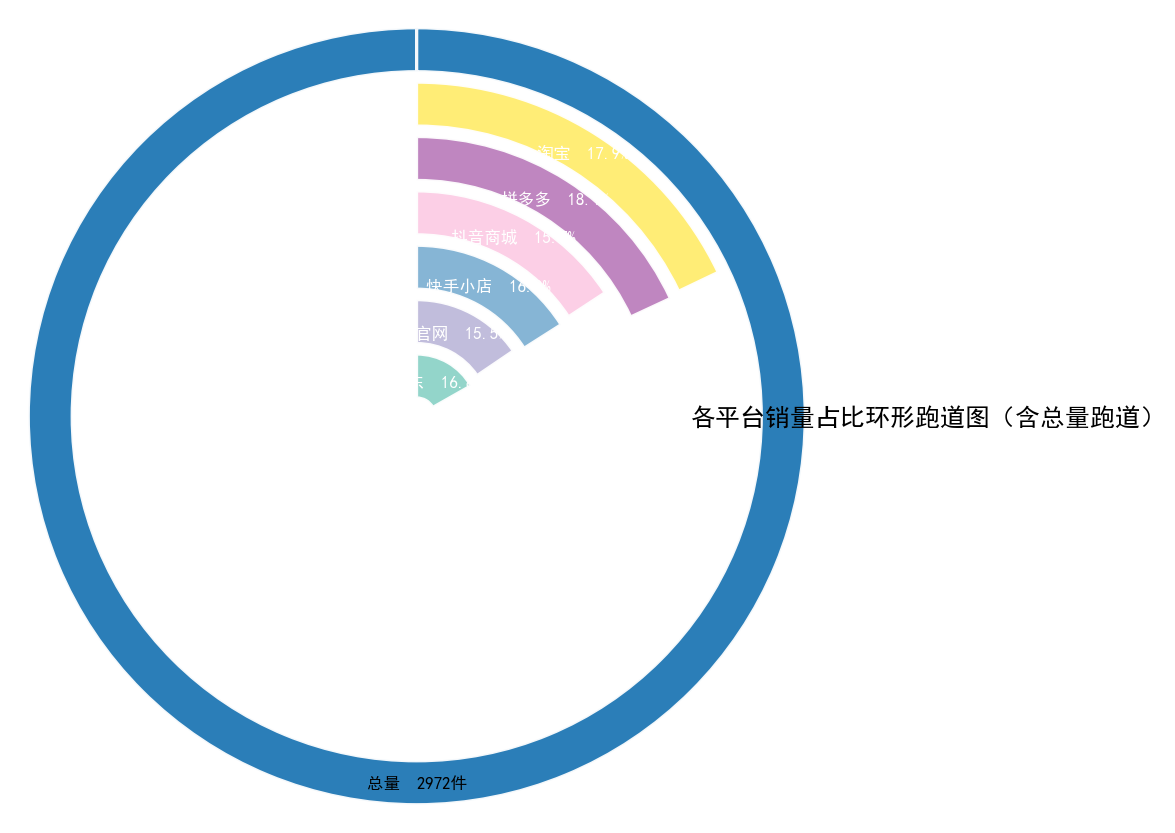

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.sans-serif'] = ['SimHei', 'DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.size'] = 11

df = pd.read_excel(r"D:\python\新建文件夹\erp_order_data.xlsx")
platform_sales = df.groupby('platform')['quantity'].sum().reset_index()
total_sales = platform_sales['quantity'].sum()
platform_sales['销量占比(%)'] = (platform_sales['quantity'] / total_sales) * 100

total_row = pd.DataFrame({'platform': ['总量'], 'quantity': [total_sales], '销量占比(%)': [100.0]})
platform_sales = pd.concat([platform_sales, total_row], ignore_index=True)
platform_sales = platform_sales.sort_values('销量占比(%)', ascending=True)

fig, ax = plt.subplots(figsize=(12, 12), subplot_kw={'projection': 'polar'})
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
ax.grid(False)
ax.spines['polar'].set_visible(False)
ax.set_xticks([])
ax.set_yticks([])

band_height = 0.12
start_radius = 0.5
colors = list(plt.cm.Set3(np.linspace(0, 1, len(platform_sales)-1))) + ['#1f77b4']

for idx, row in platform_sales.iterrows():
    angle_width = (row['销量占比(%)'] / 100) * 2 * np.pi
    ax.barh(
        y=start_radius + idx * band_height,
        width=angle_width,
        height=band_height * 0.8,
        left=0,
        color=colors[idx],
        edgecolor='white',
        linewidth=2,
        alpha=0.95
    )
    text_content = f'{row["platform"]}  {row["销量占比(%)"]:.1f}%' if row['platform'] != '总量' else f'总量  {int(row["quantity"])}件'
    text_angle = angle_width / 2
    ax.text(
        text_angle,
        start_radius + idx * band_height,
        text_content,
        fontsize=12,
        fontweight='bold',
        ha='center',
        va='center',
        color='white' if row['platform'] != '总量' else 'black'
    )

ax.text(
    np.pi / 2,
    start_radius + len(platform_sales) * band_height + 0.2,
    '各平台销量占比环形跑道图',
    fontsize=18,
    fontweight='bold',
    ha='center',
    va='center'
)

plt.tight_layout()
plt.show()

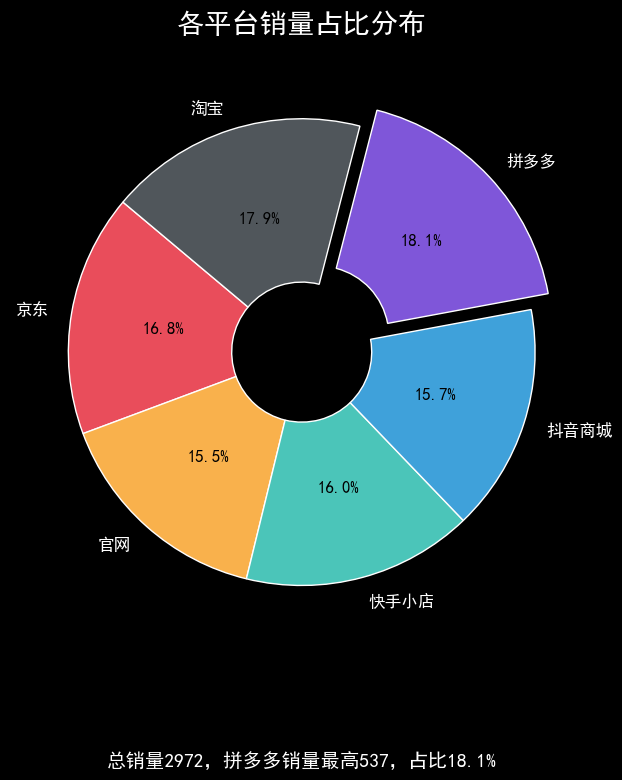

In [51]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.style.use('dark_background')

df = pd.read_excel(r"D:\python\新建文件夹\erp_order_data.xlsx")
platform_sales = df.groupby('platform')['quantity'].sum().reset_index()
total_sales = platform_sales['quantity'].sum()
platform_sales['销量占比(%)'] = (platform_sales['quantity'] / total_sales) * 100

explode = [0] * len(platform_sales)
max_idx = platform_sales['quantity'].idxmax()
explode[max_idx] = 0.1

colors = ['#e94d5b', '#f9b14c', '#4bc5b9', '#3fa1da', '#7f56d9', '#50565b']

fig, ax = plt.subplots(figsize=(10, 8))
wedges, texts, autotexts = ax.pie(
    platform_sales['销量占比(%)'],
    explode=explode,
    labels=platform_sales['platform'],
    colors=colors,
    autopct='%1.1f%%',
    startangle=140,
    wedgeprops=dict(width=0.7, edgecolor='white'),
    textprops=dict(color='white', fontsize=12)
)

for autotext in autotexts:
    autotext.set_color('black')

ax.set_title('各平台销量占比分布', fontsize=20, fontweight='bold', pad=20, color='white')
ax.text(
    0.5, -0.2, 
    f'总销量{total_sales}，{platform_sales.iloc[max_idx]["platform"]}销量最高{platform_sales.iloc[max_idx]["quantity"]}，占比{platform_sales.iloc[max_idx]["销量占比(%)"]:.1f}%',
    ha='center', va='center', fontsize=14, color='white', transform=ax.transAxes
)


plt.tight_layout()
plt.show()

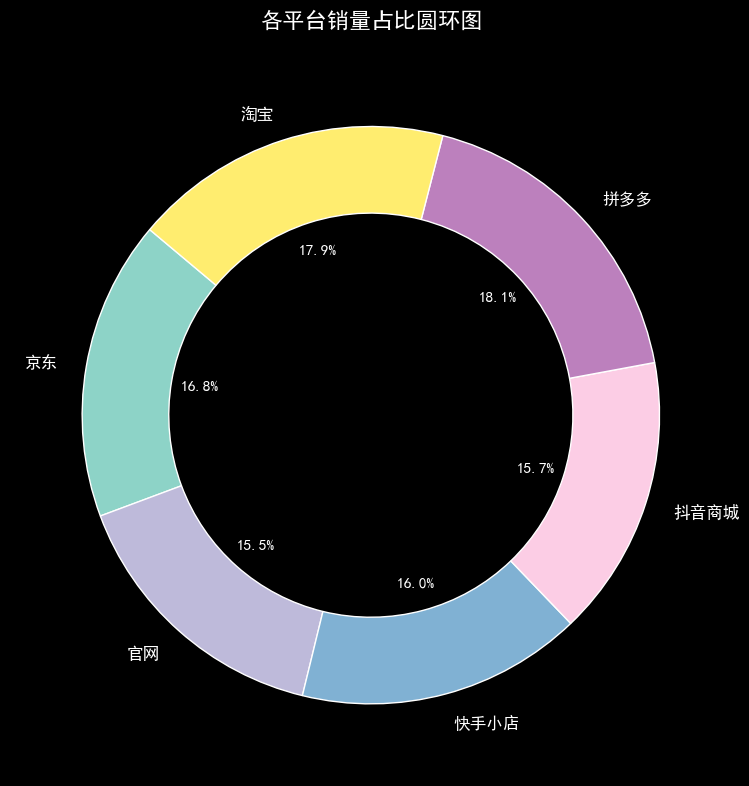

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

df = pd.read_excel(r"D:\python\新建文件夹\erp_order_data.xlsx")
platform_sales = df.groupby('platform')['quantity'].sum().reset_index()
total_sales = platform_sales['quantity'].sum()
platform_sales['销量占比(%)'] = (platform_sales['quantity'] / total_sales) * 100

labels = platform_sales['platform'].tolist()
sizes = platform_sales['销量占比(%)'].tolist()
colors = plt.cm.Set3(np.linspace(0, 1, len(labels)))

fig, ax = plt.subplots(figsize=(10, 8))
wedges, texts, autotexts = ax.pie(
    sizes,
    labels=labels,
    colors=colors,
    autopct='%1.1f%%',
    startangle=140,
    wedgeprops=dict(width=0.3, edgecolor='white'),
    textprops=dict(fontsize=12, fontweight='bold')
)

for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(11)

ax.set_title('各平台销量占比圆环图', fontsize=16, fontweight='bold', pad=20)

plt.tight_layout()
plt.show()

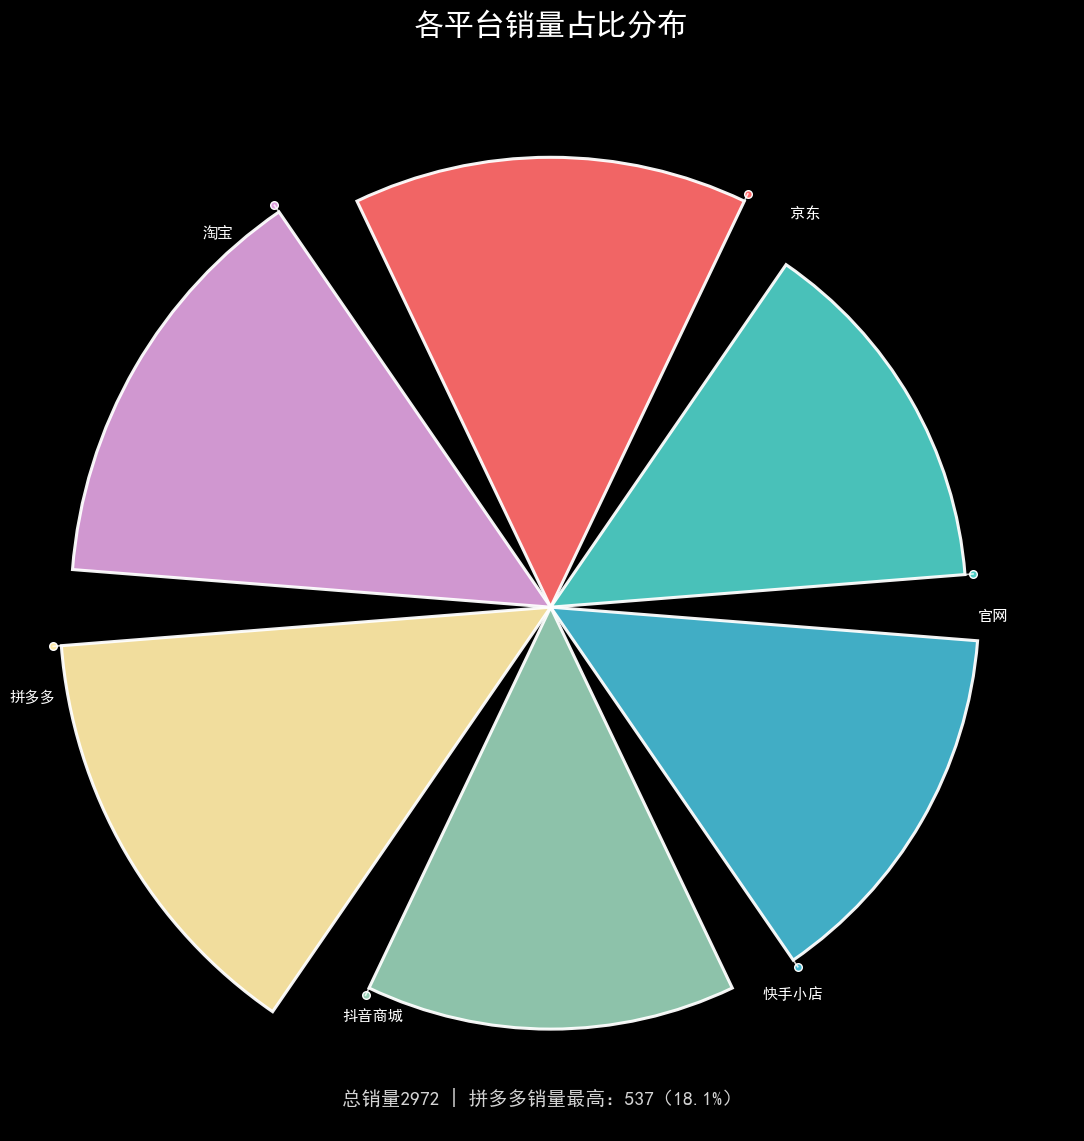

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.style.use('dark_background')

df = pd.read_excel(r"D:\python\新建文件夹\erp_order_data.xlsx")
platform_sales = df.groupby('platform')['quantity'].sum().reset_index()
total_sales = platform_sales['quantity'].sum()
platform_sales['销量占比(%)'] = (platform_sales['quantity'] / total_sales) * 100

max_platform = platform_sales[platform_sales['quantity'] == platform_sales['quantity'].max()].iloc[0]

labels = platform_sales['platform'].tolist()
sizes = platform_sales['销量占比(%)'].tolist()
colors = ['#ff6b6b', '#4ecdc4', '#45b7d1', '#96ceb4', '#ffeaa7', '#dda0dd', '#ffab91', '#81d4fa']

fig, ax = plt.subplots(figsize=(12, 12), subplot_kw={'projection': 'polar'})
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
ax.grid(False)
ax.spines['polar'].set_visible(False)
ax.set_xticks([])
ax.set_yticks([])

n = len(labels)
angles = np.linspace(0, 2 * np.pi, n, endpoint=False)
width = 2 * np.pi / n * 0.85
bottom = 1.8

explode = [0] * n
explode[labels.index(max_platform['platform'])] = 0.25
heights = [s + exp for s, exp in zip(sizes, explode)]

bars = ax.bar(
    angles, heights, width=width, bottom=bottom,
    color=colors[:n], edgecolor='white', linewidth=2.2, alpha=0.95
)

for i, (label, size, angle, bar) in enumerate(zip(labels, sizes, angles, bars)):
    mid_angle = angle + width / 2
    r = bottom + heights[i] + 0.3
    ax.plot([mid_angle, mid_angle], [bottom + heights[i], r], color='white', alpha=0.8, linewidth=1.2)
    ax.scatter(mid_angle, r, color=colors[i], s=30, edgecolor='white', linewidth=1)
    ha = 'right' if mid_angle > np.pi else 'left'
    x_offset = -0.1 if mid_angle > np.pi else 0.1
    ax.text(
        mid_angle + x_offset, r + 0.15,
        label, fontsize=11, fontweight='bold', color='white', ha=ha, va='center'
    )

ax.set_title('各平台销量占比分布', fontsize=22, fontweight='bold', pad=35, color='white')
ax.text(
    0.5, 0.08,
    f'总销量{total_sales} | {max_platform["platform"]}销量最高：{max_platform["quantity"]}（{max_platform["销量占比(%)"]:.1f}%）',
    ha='center', va='center', fontsize=14, color='lightgray', transform=fig.transFigure
)

plt.tight_layout()
plt.show()

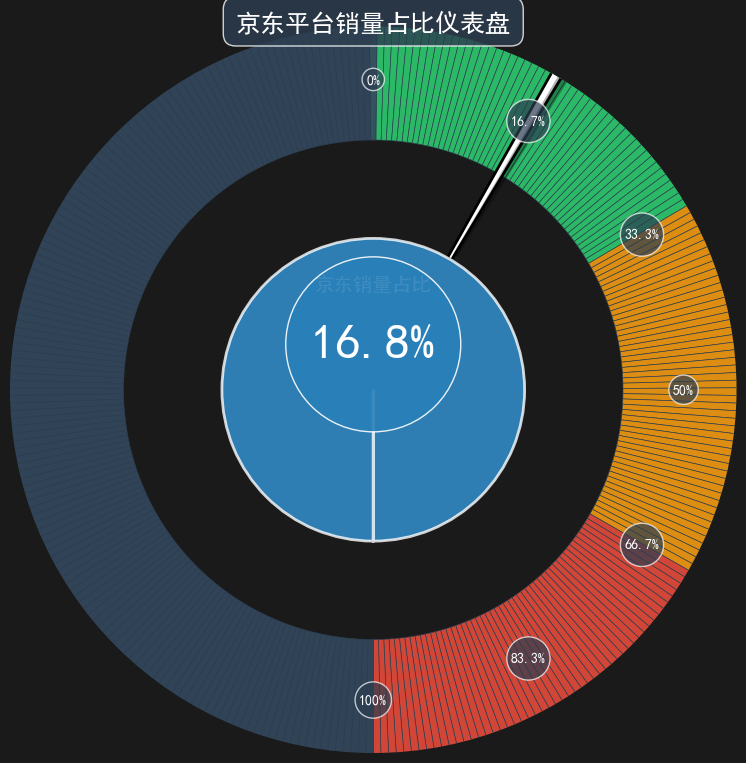

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.weight'] = 'bold'

df = pd.read_excel(r"D:\python\新建文件夹\erp_order_data.xlsx")
platform_sales = df.groupby('platform')['quantity'].sum().reset_index()
total = platform_sales['quantity'].sum()
if '京东' not in platform_sales['platform'].values:
    raise ValueError("数据中未找到'京东'平台，请检查平台名称是否正确")
jd_sales = platform_sales[platform_sales['platform'] == '京东']['quantity'].values[0]
jd_ratio = jd_sales / total * 100

fig = plt.figure(figsize=(10, 8), facecolor='#1a1a1a')
ax = fig.add_subplot(111, projection='polar', facecolor='#1a1a1a')

ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
ax.set_ylim(0, 1.2)
ax.grid(False)
ax.spines['polar'].set_visible(False)
ax.set_xticks([])
ax.set_yticks([])

angle_range = np.linspace(0, 2*np.pi, 300)
rad_base = 0.9
width = 0.15
colors = []
for angle in angle_range:
    deg = angle * 180 / np.pi
    if deg <= 60:
        colors.append('#2ecc71')
    elif deg <= 120:
        colors.append('#f39c12')
    elif deg <= 180:
        colors.append('#e74c3c')
    else:
        colors.append('#34495e')
ax.bar(angle_range, [rad_base]*len(angle_range), width=2*np.pi/299, 
       bottom=rad_base - width/2, color=colors, alpha=0.9, edgecolor='#2c3e50', linewidth=0.5)

tick_degs = [0, 30, 60, 90, 120, 150, 180]
tick_labels = ['0%', '16.7%', '33.3%', '50%', '66.7%', '83.3%', '100%']
tick_rad = rad_base + width/2 + 0.05
for deg, label in zip(tick_degs, tick_labels):
    rad = np.deg2rad(deg)
    ax.text(rad, tick_rad, label, fontsize=10, color='white', 
            ha='center', va='center', bbox=dict(boxstyle='circle,pad=0.3', facecolor='#2c3e50', alpha=0.7))

jd_rad = np.deg2rad(jd_ratio * 1.8)
pointer_length = 0.8
pointer_width = 0.03
ax.bar(jd_rad, pointer_length, width=pointer_width, bottom=rad_base - pointer_length/2, 
       color='white', alpha=1, edgecolor='black', linewidth=2)
ax.bar(jd_rad + 0.02, pointer_length - 0.05, width=pointer_width, 
       bottom=rad_base - pointer_length/2 + 0.02, color='black', alpha=0.3, linewidth=0)

center_rad = 0.5
ax.bar(0, center_rad, width=2*np.pi, bottom=0, color='#3498db', alpha=0.8, 
       edgecolor='white', linewidth=2, capstyle='round')
ax.text(0, center_rad/2 + 0.1, '京东销量占比', fontsize=14, color='white', 
        ha='center', va='center', fontweight='bold')
ax.text(0, center_rad/2 - 0.1, f'{jd_ratio:.1f}%', fontsize=36, color='white', 
        ha='center', va='center', fontweight='bold', 
        bbox=dict(boxstyle='circle,pad=0.5', facecolor='#2980b9', alpha=0.9))

fig.suptitle('京东平台销量占比仪表盘', fontsize=18, color='white', y=0.95, 
             fontweight='bold', bbox=dict(boxstyle='round,pad=0.5', facecolor='#2c3e50', alpha=0.8))

plt.tight_layout()
plt.show()

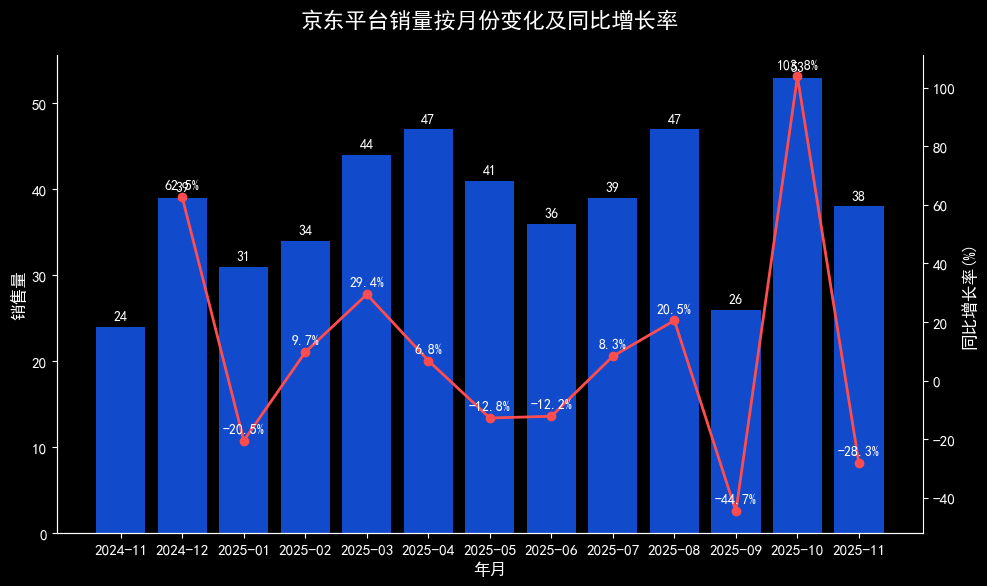

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.style.use('dark_background')

df = pd.read_excel(r"D:\python\新建文件夹\erp_order_data.xlsx")
df['order_time'] = pd.to_datetime(df['order_time'], errors='coerce')
df = df.dropna(subset=['order_time'])
df['年月'] = df['order_time'].dt.strftime('%Y-%m')

jd_data = df[df['platform'] == '京东'].groupby('年月')['quantity'].sum().reset_index()
jd_data['同比增长率(%)'] = jd_data['quantity'].pct_change() * 100
jd_data['同比增长率(%)'] = jd_data['同比增长率(%)'].round(1)

fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

ax1.bar(jd_data['年月'], jd_data['quantity'], color='#165DFF', alpha=0.8, label='销售量')
ax1.set_ylabel('销售量', fontsize=12, color='white')
ax1.tick_params(axis='y', labelcolor='white')

ax2.plot(jd_data['年月'], jd_data['同比增长率(%)'], color='#FF4D4F', marker='o', linewidth=2, markersize=6, label='同比增长率')
ax2.set_ylabel('同比增长率(%)', fontsize=12, color='white')
ax2.tick_params(axis='y', labelcolor='white')

for i, (val, pct) in enumerate(zip(jd_data['quantity'], jd_data['同比增长率(%)'])):
    ax1.text(i, val + max(jd_data['quantity'])*0.01, f'{val}', ha='center', va='bottom', color='white', fontsize=10)
    if not pd.isna(pct):
        ax2.text(i, pct + max(jd_data['同比增长率(%)'].dropna())*0.02, f'{pct}%', ha='center', va='bottom', color='white', fontsize=10)

ax1.set_title('京东平台销量按月份变化及同比增长率', fontsize=16, color='white', pad=20)
ax1.set_xlabel('年月', fontsize=12, color='white')

ax1.grid(False)
ax2.grid(False)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_color('white')
ax1.spines['bottom'].set_color('white')
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_color('white')

plt.xticks(rotation=45, ha='right', color='white')
plt.tight_layout()
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_63584\1772704775.py:45: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(platform_stats['platform'], rotation=45, ha='right')


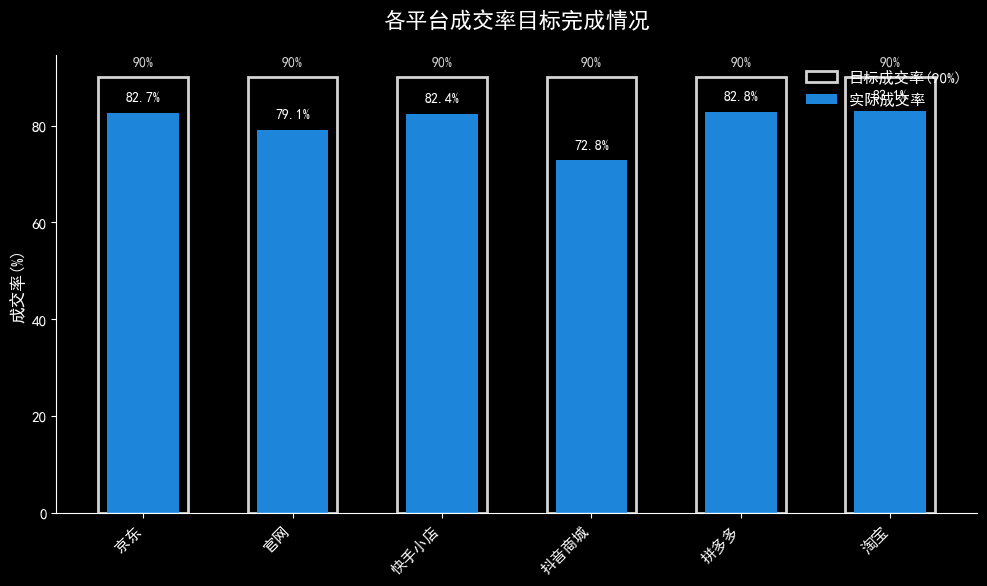

In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.style.use('dark_background')

df = pd.read_excel(r"D:\python\新建文件夹\erp_order_data.xlsx")
df = df.dropna(subset=['platform', 'status', 'online_order_number'])

platform_stats = df.groupby('platform').agg(
    总订单数=('online_order_number', 'count'),
    取消订单数=('status', lambda x: x.str.contains('已取消', na=False).sum())
).reset_index()

platform_stats['成交订单数'] = platform_stats['总订单数'] - platform_stats['取消订单数']
platform_stats['成交率(%)'] = np.where(
    platform_stats['总订单数'] > 0,
    (platform_stats['成交订单数'] / platform_stats['总订单数']) * 100,
    0
).round(1)
platform_stats['目标成交率(%)'] = 90

fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.6

ax.bar(platform_stats['platform'], platform_stats['目标成交率(%)'], 
       width=bar_width, edgecolor='lightgray', color='none', linewidth=2,
       label='目标成交率(90%)')
ax.bar(platform_stats['platform'], platform_stats['成交率(%)'], 
       width=bar_width*0.8, color='#2196F3', alpha=0.9,
       label='实际成交率')

for i, row in platform_stats.iterrows():
    ax.text(i, row['目标成交率(%)'] + 2, f'{row["目标成交率(%)"]}%', 
            ha='center', va='bottom', color='lightgray', fontsize=10)
    ax.text(i, row['成交率(%)'] + 2, f'{row["成交率(%)"]}%', 
            ha='center', va='bottom', color='white', fontsize=10)

ax.set_title('各平台成交率目标完成情况', fontsize=16, color='white', pad=20)
ax.set_ylabel('成交率(%)', fontsize=12, color='white')
# 分开设置x轴刻度标签的旋转和对齐（修复ha参数错误）
ax.tick_params(axis='x', labelcolor='white')
ax.set_xticklabels(platform_stats['platform'], rotation=45, ha='right')
ax.tick_params(axis='y', labelcolor='white')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('white')
ax.spines['bottom'].set_color('white')
ax.legend(loc='upper right', frameon=False, labelcolor='white', fontsize=11)

plt.tight_layout()
plt.show()

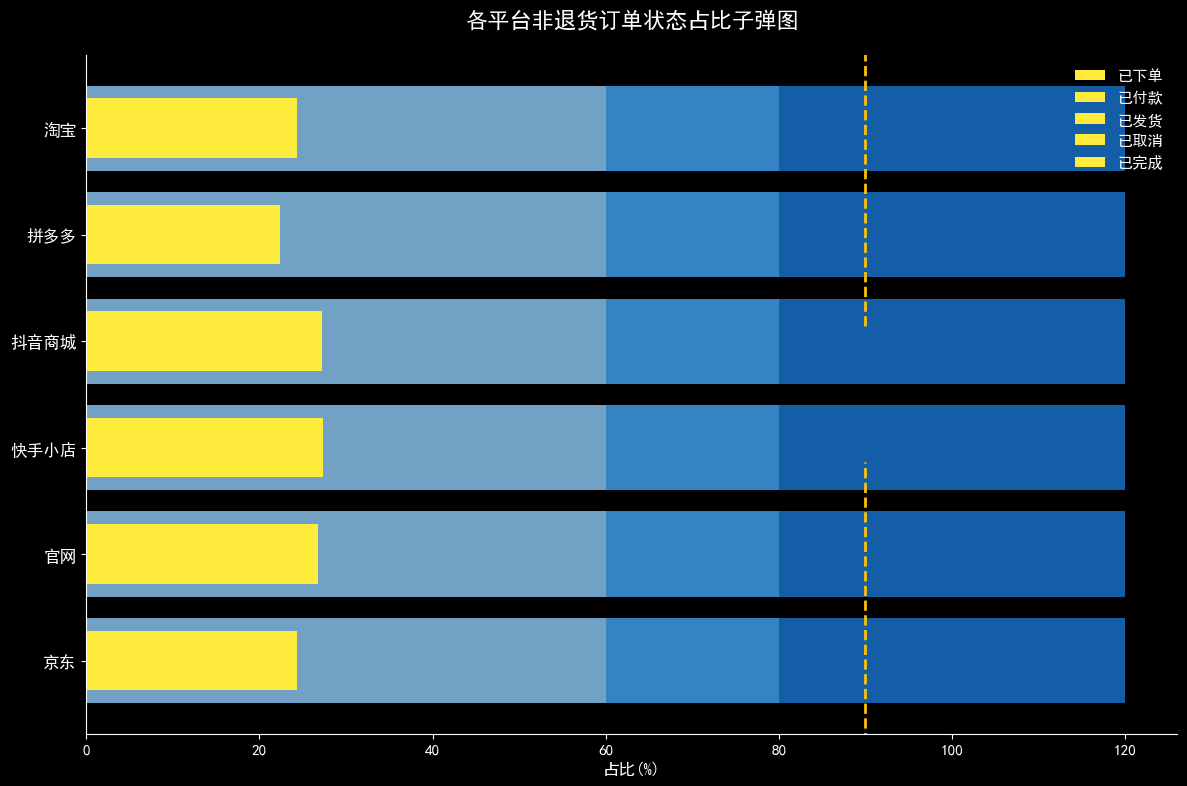

In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.style.use('dark_background')

df = pd.read_excel(r"D:\python\新建文件夹\erp_order_data.xlsx")
df = df.dropna(subset=['platform', 'status'])
non_return = df[~df['status'].str.contains('退货', na=False)]
platform_status = non_return.groupby(['platform', 'status'])['online_order_number'].count().reset_index()
platform_total = non_return.groupby('platform')['online_order_number'].count().reset_index().rename(columns={'online_order_number': '总订单数'})
platform_status = platform_status.merge(platform_total, on='platform', how='left')
platform_status['占比(%)'] = (platform_status['online_order_number'] / platform_status['总订单数']) * 100
platform_status['占比(%)'] = platform_status['占比(%)'].round(1)

target = 90
platforms = platform_status['platform'].unique()
statuses = platform_status['status'].unique()

colors = {
    '及格': '#90CAF9',
    '良好': '#42A5F5',
    '优秀': '#1976D2'
}
actual_color = '#FFEB3B'
target_color = '#FFC107'

fig, ax = plt.subplots(figsize=(12, 8))
bar_height = 0.8
y_pos = np.arange(len(platforms))

for i, platform in enumerate(platforms):
    ax.barh(y_pos[i], 60, height=bar_height, left=0, color=colors['及格'], alpha=0.8)
    ax.barh(y_pos[i], 20, height=bar_height, left=60, color=colors['良好'], alpha=0.8)
    ax.barh(y_pos[i], 40, height=bar_height, left=80, color=colors['优秀'], alpha=0.8)
    
    for status in statuses:
        pct = platform_status[(platform_status['platform'] == platform) & (platform_status['status'] == status)]['占比(%)'].values[0]
        ax.barh(y_pos[i], pct, height=bar_height*0.7, left=0, color=actual_color, alpha=1, label=status if i==0 else "")
    
    ax.axvline(x=target, color=target_color, linestyle='--', linewidth=2, ymin=y_pos[i]-bar_height/2, ymax=y_pos[i]+bar_height/2)

ax.set_yticks(y_pos)
ax.set_yticklabels(platforms, color='white', fontsize=12)
ax.set_xlabel('占比(%)', color='white', fontsize=12)
ax.set_title('各平台非退货订单状态占比子弹图', color='white', fontsize=16, pad=20)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('white')
ax.spines['bottom'].set_color('white')
ax.tick_params(axis='x', labelcolor='white')
ax.legend(loc='upper right', frameon=False, labelcolor='white')

plt.tight_layout()
plt.show()

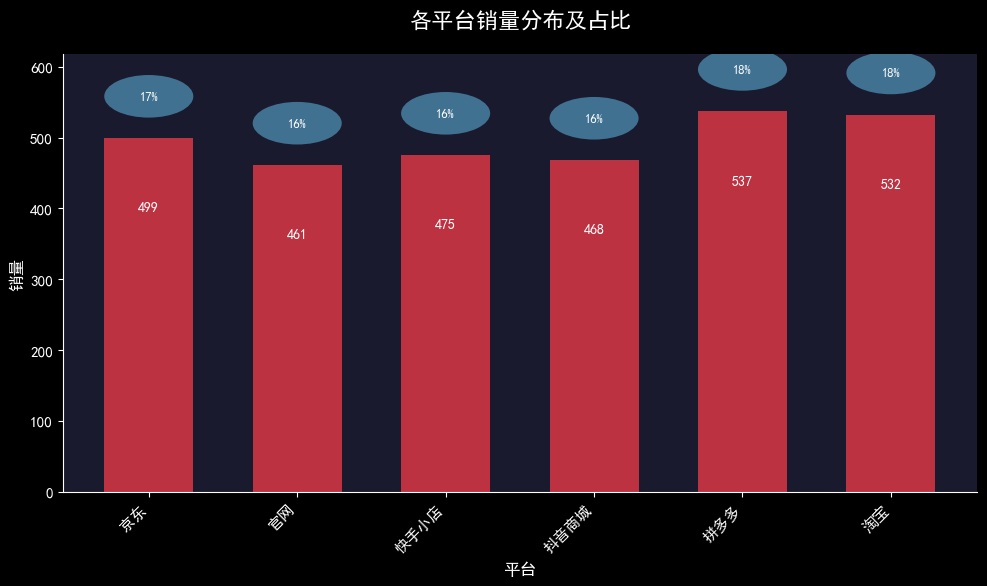

In [111]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Ellipse

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.style.use('dark_background')

df = pd.read_excel(r"D:\python\新建文件夹\erp_order_data.xlsx")
platform_sales = df.groupby('platform')['quantity'].sum().reset_index()
total_sales = platform_sales['quantity'].sum()
platform_sales['占比(%)'] = (platform_sales['quantity'] / total_sales * 100).round(0).astype(int)

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_facecolor('#1A1A2E')
bar_color = '#E63946'
circle_color = '#457B9D'
bar_width = 0.6

x = np.arange(len(platform_sales))
ax.bar(x, platform_sales['quantity'], width=bar_width, color=bar_color, alpha=0.8)

y_max = platform_sales['quantity'].max() * 1.15
ax.set_ylim(0, y_max)
x_lim = ax.get_xlim()
y_lim = ax.get_ylim()
x_range = x_lim[1] - x_lim[0]
y_range = y_lim[1] - y_lim[0]
ellipse_height = bar_width * (y_range / x_range)

for i, row in platform_sales.iterrows():
    y_pos = row['quantity'] + total_sales * 0.02
    ellipse = Ellipse((x[i], y_pos), width=bar_width, height=ellipse_height, 
                      facecolor=circle_color, alpha=0.9, edgecolor='none')
    ax.add_patch(ellipse)
    ax.text(x[i], y_pos, f'{row["占比(%)"]}%', ha='center', va='center', 
            color='white', fontweight='bold', fontsize=9)
    ax.text(x[i], row['quantity'] - total_sales * 0.03, f'{row["quantity"]}', 
            ha='center', va='top', color='white', fontweight='bold', fontsize=10)

ax.set_title('各平台销量分布及占比', fontsize=16, color='white', pad=20)
ax.set_xlabel('平台', fontsize=12, color='white')
ax.set_ylabel('销量', fontsize=12, color='white')
ax.set_xticks(x)
ax.set_xticklabels(platform_sales['platform'], color='white', rotation=45, ha='right')
ax.tick_params(axis='y', labelcolor='white')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('white')
ax.spines['bottom'].set_color('white')

plt.tight_layout()
plt.show()

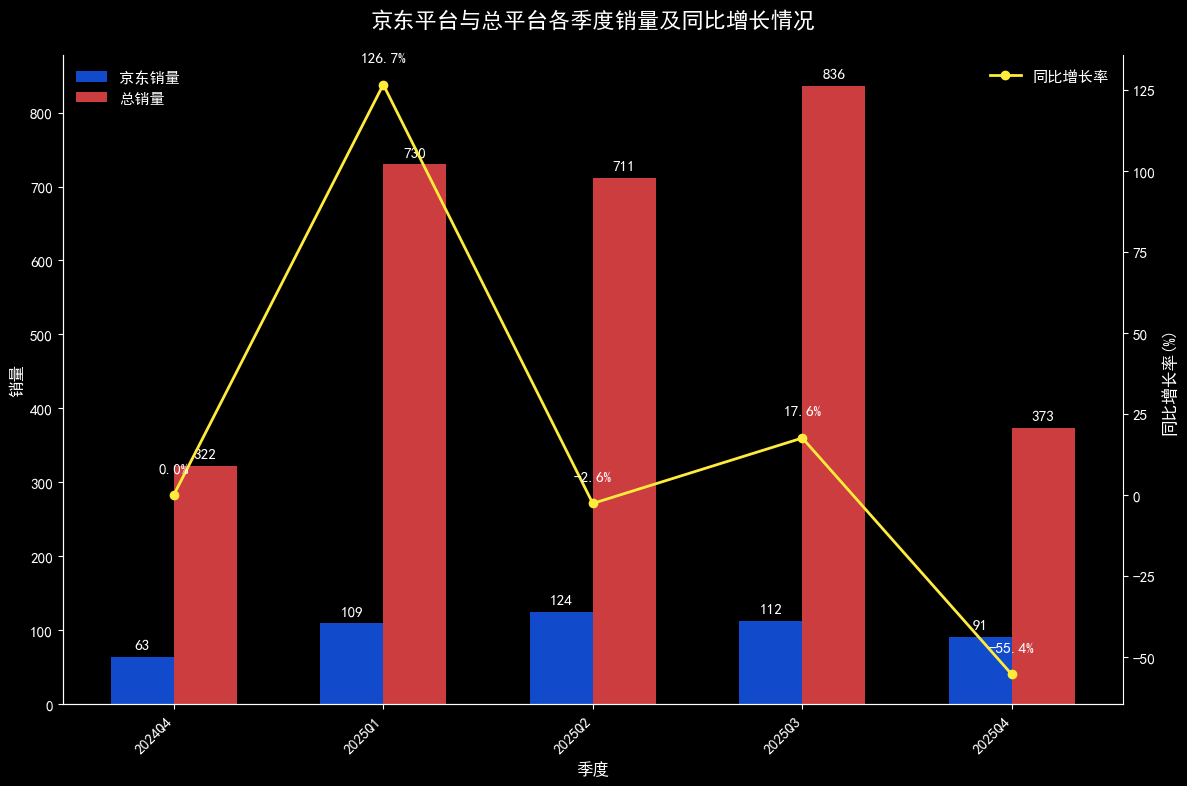

In [119]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.style.use('dark_background')

df = pd.read_excel(r"D:\python\新建文件夹\erp_order_data.xlsx")
df['order_time'] = pd.to_datetime(df['order_time'], errors='coerce')
df = df.dropna(subset=['order_time', 'platform', 'quantity'])
df['季度'] = df['order_time'].dt.to_period('Q').astype(str)

jd_sales = df[df['platform'] == '京东'].groupby('季度')['quantity'].sum().reset_index()
total_sales = df.groupby('季度')['quantity'].sum().reset_index()
merged = jd_sales.merge(total_sales, on='季度', suffixes=('_京东', '_总'))
merged = merged.dropna(subset=['quantity_京东', 'quantity_总'])

merged['同比增长率(%)'] = merged['quantity_总'].pct_change() * 100
merged['同比增长率(%)'] = merged['同比增长率(%)'].fillna(0).round(1)

fig, ax1 = plt.subplots(figsize=(12, 8))
ax2 = ax1.twinx()

bar_width = 0.3
x = np.arange(len(merged['季度']))
ax1.bar(x - bar_width/2, merged['quantity_京东'], width=bar_width, color='#165DFF', label='京东销量', alpha=0.8)
ax1.bar(x + bar_width/2, merged['quantity_总'], width=bar_width, color='#FF4D4F', label='总销量', alpha=0.8)
ax2.plot(x, merged['同比增长率(%)'], color='#FFEB3B', marker='o', linewidth=2, markersize=6, label='同比增长率')

for i, row in merged.iterrows():
    if np.isfinite(row['quantity_京东']):
        ax1.text(x[i] - bar_width/2, row['quantity_京东'] + max(merged['quantity_总'])*0.01, 
                f'{int(row["quantity_京东"])}', ha='center', va='bottom', color='white')
    if np.isfinite(row['quantity_总']):
        ax1.text(x[i] + bar_width/2, row['quantity_总'] + max(merged['quantity_总'])*0.01, 
                f'{int(row["quantity_总"])}', ha='center', va='bottom', color='white')
    if np.isfinite(row['同比增长率(%)']):
        ax2.text(x[i], row['同比增长率(%)'] + max(merged['同比增长率(%)'].abs())*0.05, 
                f'{row["同比增长率(%)"]}%', ha='center', va='bottom', color='white')

ax1.set_title('京东平台与总平台各季度销量及同比增长情况', fontsize=16, color='white', pad=20)
ax1.set_xlabel('季度', fontsize=12, color='white')
ax1.set_ylabel('销量', fontsize=12, color='white')
ax2.set_ylabel('同比增长率(%)', fontsize=12, color='white')

ax1.set_xticks(x)
ax1.set_xticklabels(merged['季度'], color='white', rotation=45, ha='right')
ax1.tick_params(axis='y', labelcolor='white')
ax2.tick_params(axis='y', labelcolor='white')

ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_color('white')
ax1.spines['bottom'].set_color('white')
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_color('white')

ax1.legend(loc='upper left', frameon=False, labelcolor='white')
ax2.legend(loc='upper right', frameon=False, labelcolor='white')

plt.tight_layout()
plt.show()

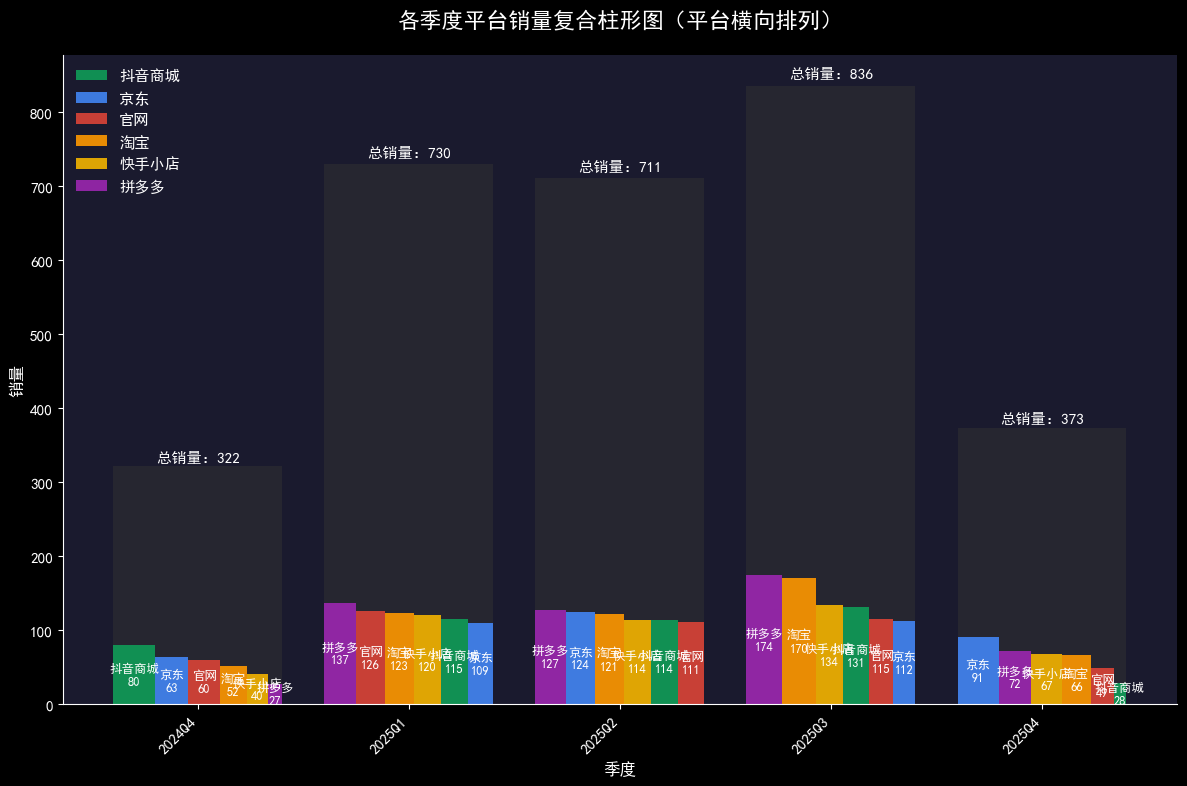

In [125]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.style.use('dark_background')

df = pd.read_excel(r"D:\python\新建文件夹\erp_order_data.xlsx")
df['order_time'] = pd.to_datetime(df['order_time'], errors='coerce')
df = df.dropna(subset=['order_time', 'platform', 'quantity'])
df['季度'] = df['order_time'].dt.to_period('Q').astype(str)

platform_quarter = df.groupby(['季度', 'platform'])['quantity'].sum().reset_index()
quarter_total = platform_quarter.groupby('季度')['quantity'].sum().reset_index().rename(columns={'quantity': '总销量'})
merged = platform_quarter.merge(quarter_total, on='季度', how='left')
merged['占比'] = merged['quantity'] / merged['总销量']

quarters = merged['季度'].unique()
platforms = merged['platform'].unique()
colors = ['#4285F4', '#DB4437', '#F4B400', '#0F9D58', '#9C27B0', '#FF9800']
bar_width = 0.8
x = np.arange(len(quarters))

fig, ax = plt.subplots(figsize=(12, 8))
ax.set_facecolor('#1A1A2E')

ax.bar(x, merged.groupby('季度')['总销量'].first(), width=bar_width, color='#333333', alpha=0.5)

for quarter_idx, quarter in enumerate(quarters):
    quarter_data = merged[merged['季度'] == quarter].sort_values('quantity', ascending=False)
    left_pos = x[quarter_idx] - bar_width/2  
    for _, row in quarter_data.iterrows():
        small_width = bar_width * row['占比']
        ax.bar(left_pos + small_width/2, 
               row['quantity'], 
               width=small_width, 
               color=colors[platforms.tolist().index(row['platform']) % len(colors)], 
               alpha=0.9,
               label=row['platform'] if quarter_idx == 0 else "")
        
        ax.text(left_pos + small_width/2, 
                row['quantity']/2, 
                f'{row["platform"]}\n{int(row["quantity"])}', 
                ha='center', va='center', color='white', fontsize=9, fontweight='bold')
        
        left_pos += small_width

for i, total in enumerate(merged.groupby('季度')['总销量'].first()):
    ax.text(x[i], total + total*0.01, f'总销量：{int(total)}', ha='center', va='bottom', color='white', fontsize=11, fontweight='bold')

ax.set_title('各季度平台销量复合柱形图（平台横向排列）', fontsize=16, color='white', pad=20)
ax.set_xlabel('季度', fontsize=12, color='white')
ax.set_ylabel('销量', fontsize=12, color='white')
ax.set_xticks(x)
ax.set_xticklabels(quarters, color='white', rotation=45, ha='right')
ax.tick_params(axis='y', labelcolor='white')

handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(), loc='upper left', frameon=False, labelcolor='white')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('white')
ax.spines['bottom'].set_color('white')

plt.tight_layout()
plt.show()

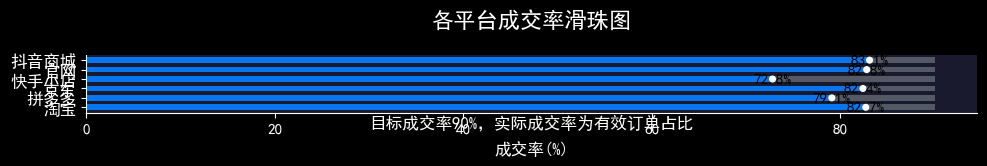

In [135]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.style.use('dark_background')

df = pd.read_excel(r"D:\python\新建文件夹\erp_order_data.xlsx")
df = df.dropna(subset=['platform', 'status', 'online_order_number'])

platform_stats = df.groupby('platform').agg(
    总订单数=('online_order_number', 'count'),
    有效订单数=('status', lambda x: x[~x.str.contains('退货|取消', na=False)].count())
).reset_index()

platform_stats['成交率(%)'] = (platform_stats['有效订单数'] / platform_stats['总订单数'] * 100).round(1)
platform_stats = platform_stats.sort_values('成交率(%)', ascending=False)

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_facecolor('#1A1A2E')

bar_height = 0.6
y_pos = np.arange(len(platform_stats))
target = 90

ax.set_aspect('equal')

for i, row in platform_stats.iterrows():
    ax.barh(y_pos[i], target, height=bar_height, color='#6C757D', alpha=0.7)
    ax.barh(y_pos[i], row['成交率(%)'], height=bar_height, color='#007BFF', alpha=0.9)
    circle = plt.Circle((row['成交率(%)'], y_pos[i]), radius=bar_height/2, color='white', alpha=1)
    ax.add_patch(circle)
    
    ax.text(row['成交率(%)'], y_pos[i], f'{row["成交率(%)"]}%', ha='center', va='center', color='black', fontweight='bold')

ax.set_yticks(y_pos)
ax.set_yticklabels(platform_stats['platform'], color='white', fontsize=12)
ax.set_xlabel('成交率(%)', color='white', fontsize=12)
ax.set_title('各平台成交率滑珠图', color='white', fontsize=16, pad=20)
ax.text(0.5, -0.15, '目标成交率90%，实际成交率为有效订单占比', ha='center', va='center', fontsize=12, color='white', transform=ax.transAxes)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('white')
ax.spines['bottom'].set_color('white')
ax.tick_params(axis='x', labelcolor='white')

plt.tight_layout()
plt.show()

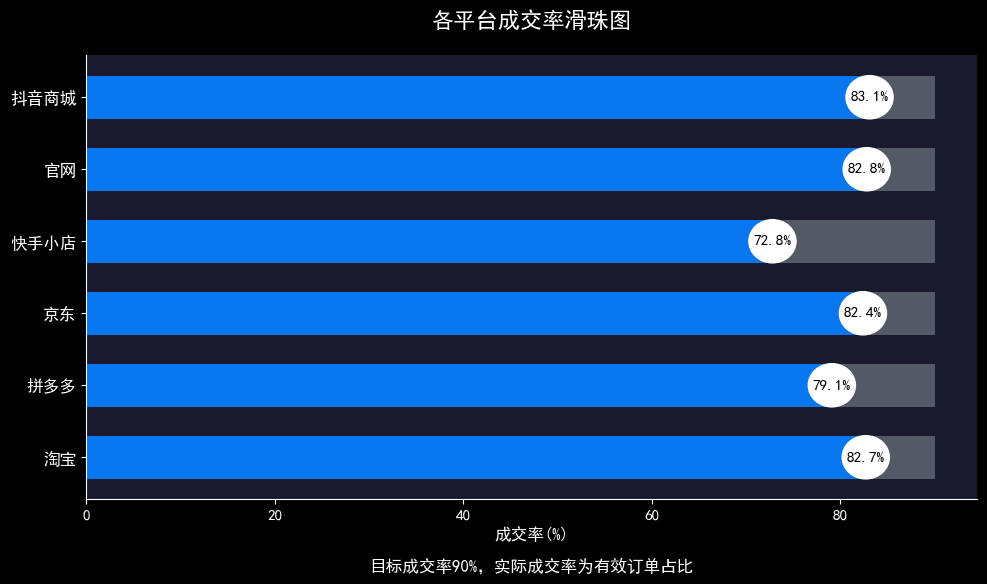

In [157]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Ellipse

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.style.use('dark_background')

df = pd.read_excel(r"D:\python\新建文件夹\erp_order_data.xlsx")
df = df.dropna(subset=['platform', 'status', 'online_order_number'])

platform_stats = df.groupby('platform').agg(
    总订单数=('online_order_number', 'count'),
    有效订单数=('status', lambda x: x[~x.str.contains('退货|取消', na=False)].count())
).reset_index()

platform_stats['成交率(%)'] = (platform_stats['有效订单数'] / platform_stats['总订单数'] * 100).round(1)
platform_stats = platform_stats.sort_values('成交率(%)', ascending=False)

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_facecolor('#1A1A2E')

bar_height = 0.6
y_pos = np.arange(len(platform_stats))
target = 90

x_lim = ax.get_xlim()
y_lim = ax.get_ylim()
x_range = x_lim[1] - x_lim[0]
y_range = y_lim[1] - y_lim[0]

fig_width, fig_height = fig.get_size_inches()
aspect_ratio = (fig_width / fig_height) * (y_range / x_range)

for i, row in platform_stats.iterrows():
    ax.barh(y_pos[i], target, height=bar_height, color='#6C757D', alpha=0.7)
    ax.barh(y_pos[i], row['成交率(%)'], height=bar_height, color='#007BFF', alpha=0.9)

    ellipse = Ellipse(
        (row['成交率(%)'], y_pos[i]),
        width=bar_height * aspect_ratio * 5,
        height=bar_height,
        color='white',
        alpha=1
    )
    ax.add_patch(ellipse)
    ax.text(row['成交率(%)'], y_pos[i], f'{row["成交率(%)"]}%', ha='center', va='center', color='black', fontweight='bold')

ax.set_yticks(y_pos)
ax.set_yticklabels(platform_stats['platform'], color='white', fontsize=12)
ax.set_xlabel('成交率(%)', color='white', fontsize=12)
ax.set_title('各平台成交率滑珠图', color='white', fontsize=16, pad=20)
ax.text(0.5, -0.15, '目标成交率90%，实际成交率为有效订单占比', ha='center', va='center', fontsize=12, color='white', transform=ax.transAxes)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('white')
ax.spines['bottom'].set_color('white')
ax.tick_params(axis='x', labelcolor='white')

plt.tight_layout()
plt.show()

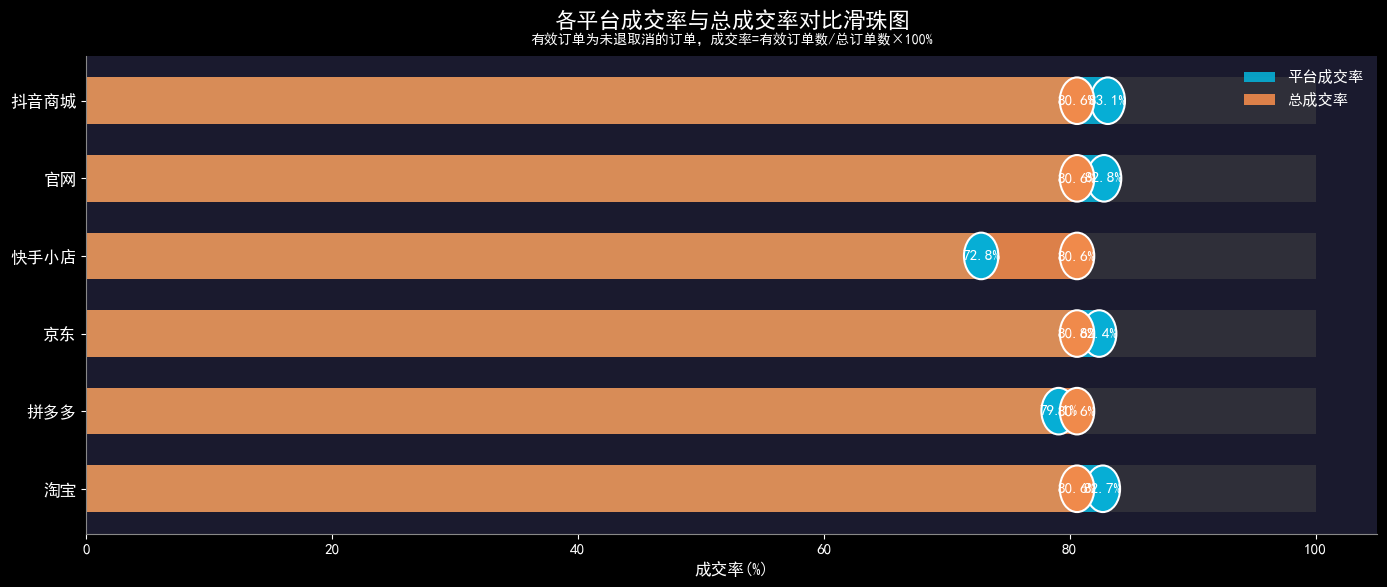

In [177]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Ellipse

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.style.use('dark_background')

df = pd.read_excel(r"D:\python\新建文件夹\erp_order_data.xlsx")
df = df.dropna(subset=['platform', 'status', 'online_order_number'])

platform_stats = df.groupby('platform').agg(
    平台总订单数=('online_order_number', 'count'),
    平台有效订单数=('status', lambda x: x[~x.str.contains('退货|取消', na=False)].count())
).reset_index()

total_orders = df['online_order_number'].count()
total_valid = df[~df['status'].str.contains('退货|取消', na=False)]['online_order_number'].count()
total_rate = (total_valid / total_orders * 100).round(1)

platform_stats['平台成交率(%)'] = (platform_stats['平台有效订单数'] / platform_stats['平台总订单数'] * 100).round(1)
platform_stats['总成交率(%)'] = total_rate
platform_stats = platform_stats.sort_values('平台成交率(%)', ascending=False)

fig, ax = plt.subplots(figsize=(14, 6))
ax.set_facecolor('#1A1A2E')

bar_height = 0.6
y_pos = np.arange(len(platform_stats))
target = 100

x_lim = ax.get_xlim()
y_lim = ax.get_ylim()
x_range = x_lim[1] - x_lim[0]
y_range = y_lim[1] - y_lim[0]
fig_width, fig_height = fig.get_size_inches()
aspect_ratio = (fig_width / fig_height) * (y_range / x_range) * 2

for i, row in platform_stats.iterrows():
    ax.barh(y_pos[i], target, height=bar_height, color='#444444', alpha=0.5)
    ax.barh(y_pos[i], row['平台成交率(%)'], height=bar_height, color='#06AED5', alpha=0.9, label='平台成交率' if i==0 else "")
    ax.barh(y_pos[i], row['总成交率(%)'], height=bar_height, color='#F08A4B', alpha=0.9, label='总成交率' if i==0 else "")
    
    ellipse_platform = Ellipse(
        (row['平台成交率(%)'], y_pos[i]),
        width=bar_height * aspect_ratio,
        height=bar_height,
        facecolor='#06AED5',
        edgecolor='white',
        linewidth=1.5,
        alpha=1
    )
    ax.add_patch(ellipse_platform)
    ax.text(row['平台成交率(%)'], y_pos[i], f'{row["平台成交率(%)"]}%', ha='center', va='center', color='white', fontweight='bold')
    
    ellipse_total = Ellipse(
        (row['总成交率(%)'], y_pos[i]),
        width=bar_height * aspect_ratio,
        height=bar_height,
        facecolor='#F08A4B',
        edgecolor='white',
        linewidth=1.5,
        alpha=1
    )
    ax.add_patch(ellipse_total)
    ax.text(row['总成交率(%)'], y_pos[i], f'{row["总成交率(%)"]}%', ha='center', va='center', color='white', fontweight='bold')

ax.set_yticks(y_pos)
ax.set_yticklabels(platform_stats['platform'], color='white', fontsize=12)
ax.set_xlabel('成交率(%)', color='white', fontsize=12)
ax.set_title('各平台成交率与总成交率对比滑珠图', color='white', fontsize=16, pad=20)
ax.text(0.5, 1.02, '有效订单为未退取消的订单，成交率=有效订单数/总订单数×100%', ha='center', va='bottom', color='white', fontsize=10, transform=ax.transAxes)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('#888888')
ax.spines['bottom'].set_color('#888888')
ax.tick_params(axis='x', labelcolor='white')

ax.legend(loc='upper right', frameon=False, labelcolor='white', fontsize=11)

plt.subplots_adjust(top=0.85, bottom=0.1, left=0.1, right=0.95)
plt.tight_layout()
plt.show()